# importation des Bibliothéque

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Reshape, Input, LSTM,Dropout, BatchNormalization, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#load & check data(bonn_uni_epilespy_data)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# List files in the dataset directory
folder_path = '/content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data'
print(os.listdir(folder_path))

['F', 'N', 'O', 'Z', 'S']


In [ ]:
# Check if there are subfolders for each class (e.g., Z, O, N, F, S)
for subfolder in ['Z', 'O', 'N', 'F', 'S']:
    subfolder_path = os.path.join(folder_path, subfolder)
    if os.path.exists(subfolder_path):
        print(f"Contents of {subfolder_path}:", os.listdir(subfolder_path))
    else:
        print(f"Subfolder {subfolder} does not exist.")

Contents of /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/Z: ['Z005.txt', 'Z038.txt', 'Z004.txt', 'Z011.txt', 'Z010.txt', 'Z006.txt', 'Z007.txt', 'Z002.txt', 'Z012.txt', 'Z013.txt', 'Z003.txt', 'Z039.txt', 'Z001.txt', 'Z017.txt', 'Z016.txt', 'Z070.txt', 'Z028.txt', 'Z029.txt', 'Z015.txt', 'Z064.txt', 'Z014.txt', 'Z072.txt', 'Z099.txt', 'Z066.txt', 'Z098.txt', 'Z058.txt', 'Z067.txt', 'Z073.txt', 'Z100.txt', 'Z061.txt', 'Z048.txt', 'Z071.txt', 'Z075.txt', 'Z060.txt', 'Z059.txt', 'Z088.txt', 'Z089.txt', 'Z074.txt', 'Z065.txt', 'Z049.txt', 'Z062.txt', 'Z076.txt', 'Z051.txt', 'Z045.txt', 'Z092.txt', 'Z086.txt', 'Z053.txt', 'Z063.txt', 'Z085.txt', 'Z047.txt', 'Z090.txt', 'Z046.txt', 'Z077.txt', 'Z052.txt', 'Z079.txt', 'Z091.txt', 'Z084.txt', 'Z050.txt', 'Z041.txt', 'Z082.txt', 'Z083.txt', 'Z068.txt', 'Z093.txt', 'Z097.txt', 'Z040.txt', 'Z054.txt', 'Z096.txt', 'Z087.txt', 'Z044.txt', 'Z069.txt', 'Z078.txt', 'Z080.txt', 'Z056.txt', 'Z024.txt', 'Z055.txt', 'Z043.txt', 'Z042.txt', 'Z0

In [ ]:
def load_class_data(folder_path, class_prefix):
    data = []
    subfolder_path = os.path.join(folder_path, class_prefix)  # Add subfolder
    for i in range(1, 101):
        file_name = f"{class_prefix}{i:03}.txt"  # e.g., Z001.txt, Z002.txt, etc.
        file_path = os.path.join(subfolder_path, file_name)  # File path with subfolder
        print(f"Attempting to load file: {file_path}")  # Debugging line

        if os.path.isfile(file_path):
            try:
                signal = np.loadtxt(file_path)
                data.append(signal)
            except ValueError as e:
                print(f"Error loading {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")
    return np.array(data)

In [ ]:
# Load data for each class (update folder paths as per your drive structure)
folder_path = '/content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data'
class_data_Z = load_class_data(folder_path, 'Z')
class_data_O = load_class_data(folder_path, 'O')
class_data_N = load_class_data(folder_path, 'N')
class_data_F = load_class_data(folder_path, 'F')
class_data_S = load_class_data(folder_path, 'S')

Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/Z/Z001.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/Z/Z002.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/Z/Z003.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/Z/Z004.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/Z/Z005.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/Z/Z006.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/Z/Z007.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/Z/Z008.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/Z/Z009.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/Z/Z010.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/ep

In [ ]:
# Check the shapes of the loaded arrays
print("Shape of class_data_Z:", class_data_Z.shape)
print("Shape of class_data_O:", class_data_O.shape)
print("Shape of class_data_N:", class_data_N.shape)
print("Shape of class_data_F:", class_data_F.shape)
print("Shape of class_data_S:", class_data_S.shape)

Shape of class_data_Z: (100, 4097)
Shape of class_data_O: (100, 4097)
Shape of class_data_N: (100, 4097)
Shape of class_data_F: (100, 4097)
Shape of class_data_S: (100, 4097)


In [ ]:
X_epilepsy_data = np.vstack([class_data for class_data in [class_data_Z, class_data_O, class_data_N, class_data_F, class_data_S] if class_data.size > 0])

In [ ]:
print("Shape of concatenated X:", X_epilepsy_data.shape)

Shape of concatenated X: (500, 4097)


In [ ]:
# Define labels for the dataset
y = np.array([0] * len(class_data_Z) +
             [1] * len(class_data_O) +
             [2] * len(class_data_N) +
             [3] * len(class_data_F) +
             [4] * len(class_data_S))

In [ ]:
y.shape

(500,)

#visualisation data shape distribution histo

In [ ]:
# Function to plot histogram for each class
def plot_histogram(data, class_name, bins=50):

    flattened_data = data.flatten()

    plt.hist(flattened_data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of Class {class_name}')
    plt.xlabel('Signal Value')
    plt.ylabel('Frequency')
    plt.show()

Plotting histograms for each class...


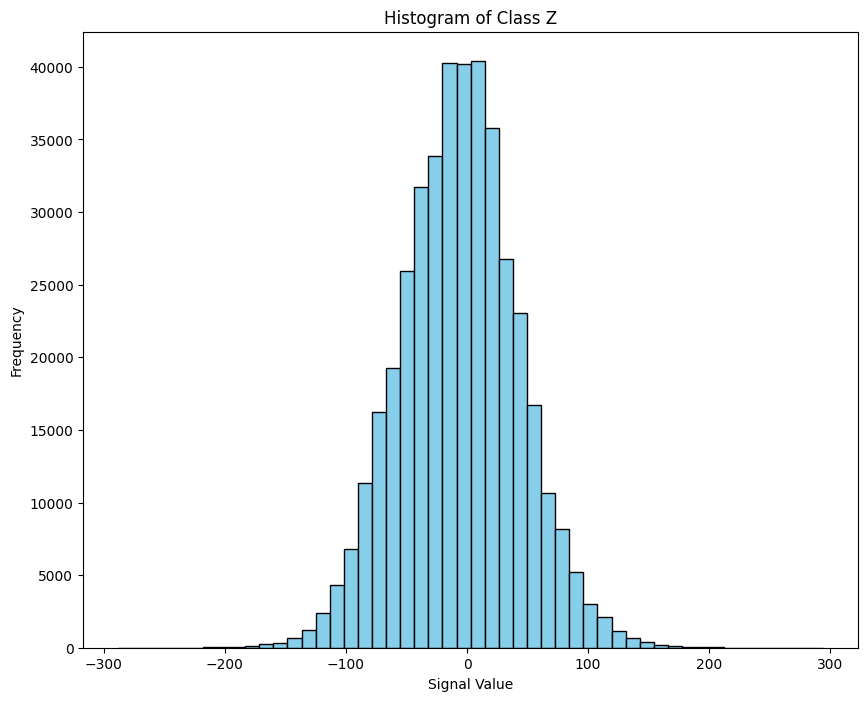

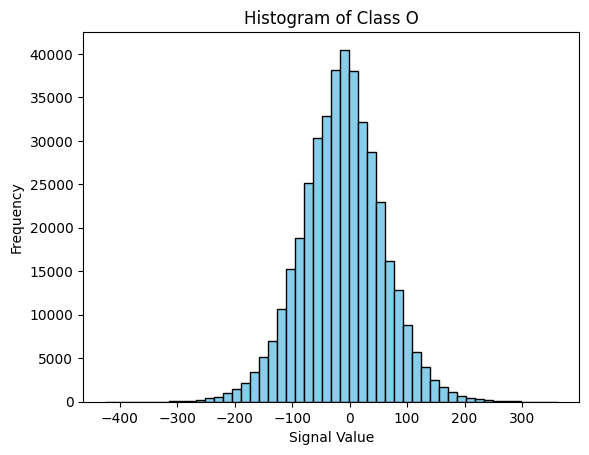

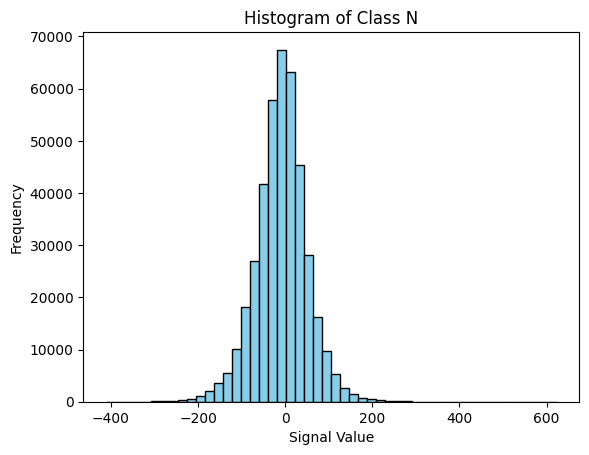

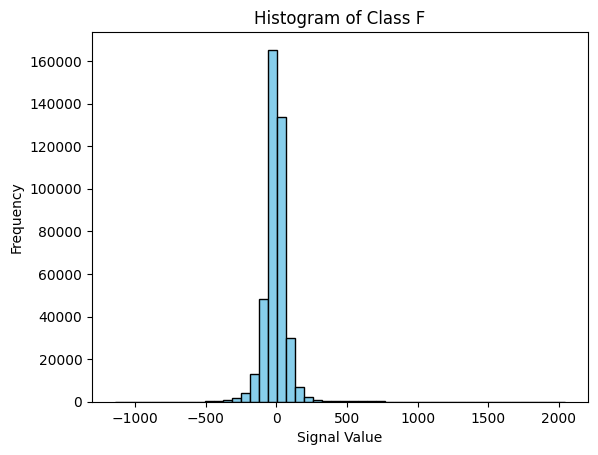

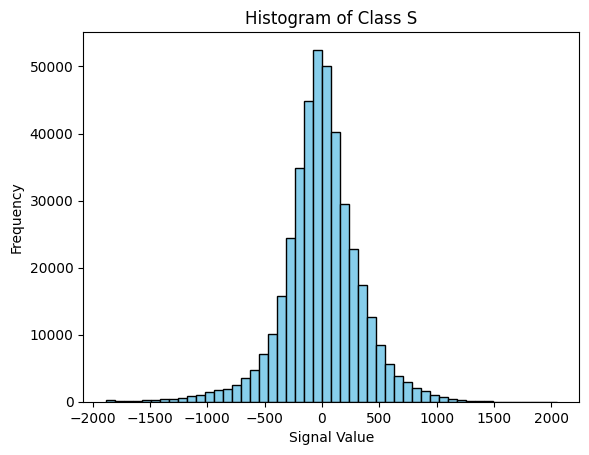

In [ ]:
# Plot histograms for each class
plt.figure(figsize=(10, 8))

print("Plotting histograms for each class...")
plot_histogram(class_data_Z, 'Z')
plot_histogram(class_data_O, 'O')
plot_histogram(class_data_N, 'N')
plot_histogram(class_data_F, 'F')
plot_histogram(class_data_S, 'S')

In [ ]:
colors = {
    'Z': 'blue',
    'O': 'green',
    'N': 'orange',
    'F': 'purple',
    'S': 'red'
}

In [ ]:
def plot_signal(signal, class_name):
    plt.plot(signal, color=colors[class_name])
    plt.title(f'Sample Signal from Class {class_name}')
    plt.xlabel('Time (Sample Index)')
    plt.ylabel('Amplitude')
    plt.show()

Plotting sample signals for each class...


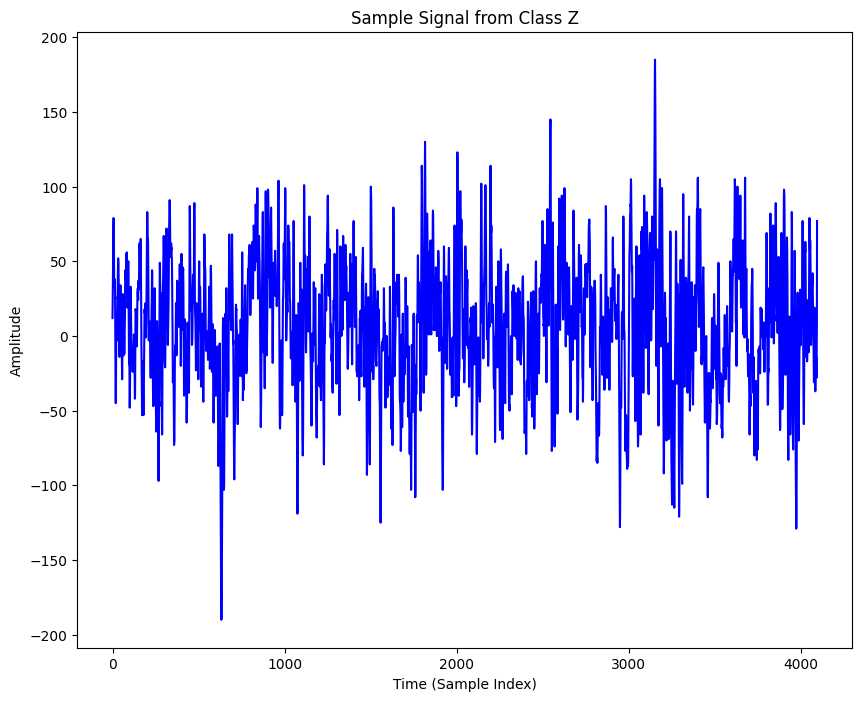

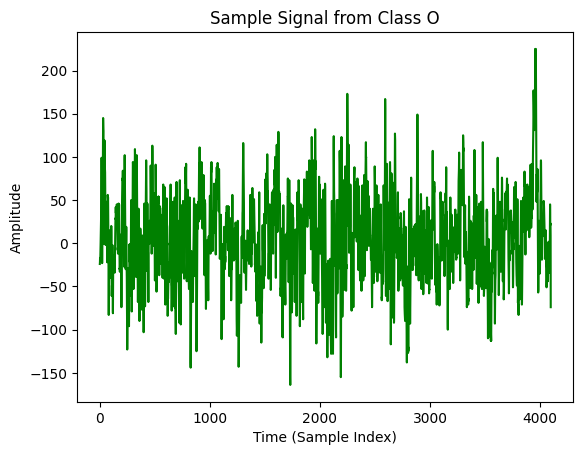

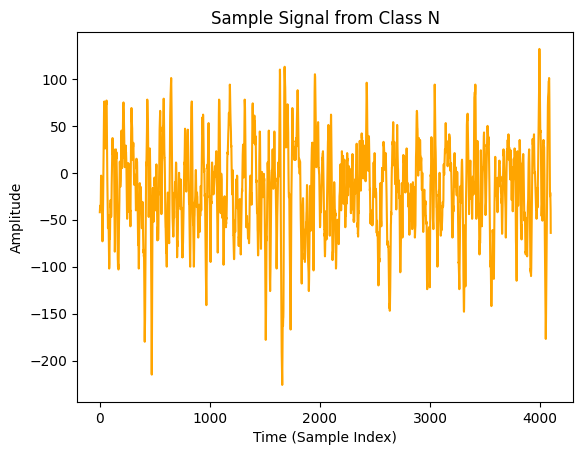

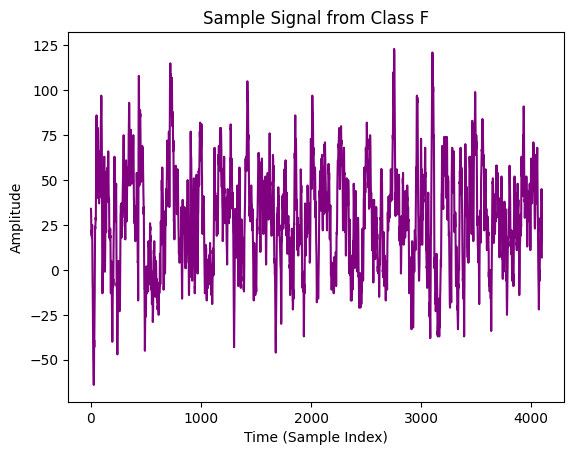

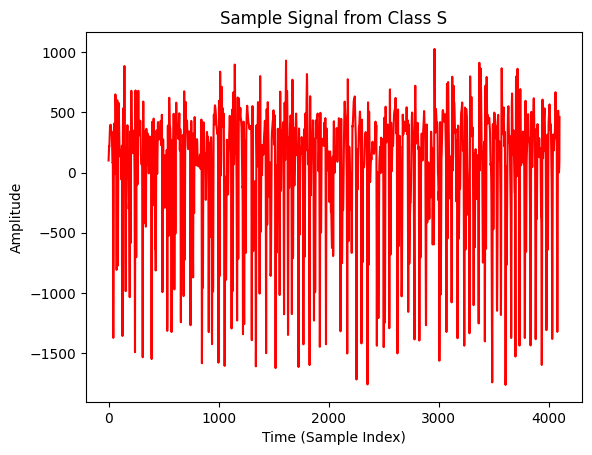

In [ ]:
# Plot one signal from each class (using the first sample as an example)
plt.figure(figsize=(10, 8))

print("Plotting sample signals for each class...")
plot_signal(class_data_Z[0], 'Z')  # Plot the first signal in class Z
plot_signal(class_data_O[0], 'O')  # Plot the first signal in class O
plot_signal(class_data_N[0], 'N')  # Plot the first signal in class N
plot_signal(class_data_F[0], 'F')  # Plot the first signal in class F
plot_signal(class_data_S[0], 'S')  # Plot the first signal in class S

In [ ]:
plt.figure(figsize=(12, 10))
# Define each class and their data in a dictionary for convenience
classes_data = {
    'Z': class_data_Z[0],  # First sample from Class Z
    'O': class_data_O[0],  # First sample from Class O
    'N': class_data_N[0],  # First sample from Class N
    'F': class_data_F[0],  # First sample from Class F
    'S': class_data_S[0],  # First sample from Class S
}

<Figure size 1200x1000 with 0 Axes>

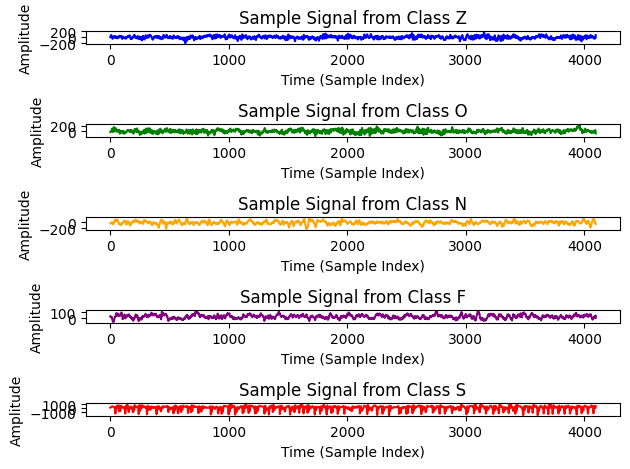

In [ ]:
for i, (class_name, signal) in enumerate(classes_data.items(), 1):
    plt.subplot(5, 1, i)  # Create a subplot for each class (5 rows, 1 column)
    plt.plot(signal, color=colors[class_name])
    plt.title(f'Sample Signal from Class {class_name}')
    plt.xlabel('Time (Sample Index)')
    plt.ylabel('Amplitude')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

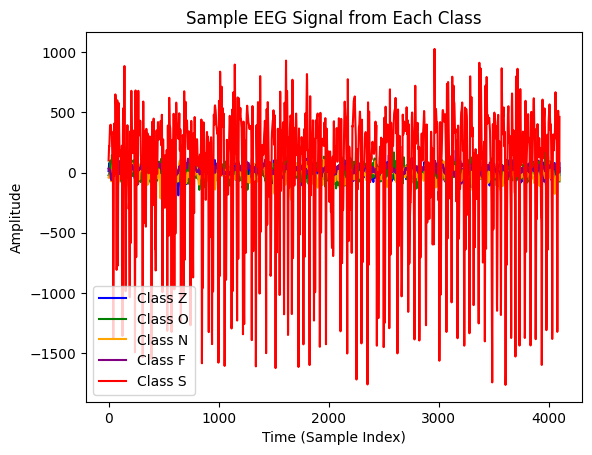

In [ ]:
for class_name, signal in classes_data.items():
    plt.plot(signal, color=colors[class_name], label=f'Class {class_name}')  # Plot each signal with its color and label

# Add title and labels
plt.title('Sample EEG Signal from Each Class')
plt.xlabel('Time (Sample Index)')
plt.ylabel('Amplitude')

# Add legend to distinguish each class
plt.legend()

# Display the plot
plt.show()

#Data Normalisation

In [ ]:
scaler = StandardScaler()
X_epilepsy_data_normalized = scaler.fit_transform(X_epilepsy_data)

In [ ]:
X_epilepsy_data_normalized.shape

(500, 4097)

In [ ]:
# Replace `X_epilepsy_data_normalized` with your actual EEG data
X = X_epilepsy_data_normalized  # Shape: (500, 4097)

#1 define window for EEG Signals

In [ ]:
def segment_signal(signal, window_size=1458, overlap=486):
    step = window_size - overlap
    segments = []
    for start in range(0, len(signal) - window_size + 1, step):
        segments.append(signal[start:start + window_size])
    return np.array(segments)

In [ ]:
window_size = 1458
overlap = 486

In [ ]:
# Apply windowing to all signals
X_windowed = []
y_windowed = []
for signal, label in zip(X, y):
    signal_windows = segment_signal(signal, window_size, overlap)
    X_windowed.extend(signal_windows)
    y_windowed.extend([label] * len(signal_windows))  # Repeat the label for each window

X_windowed = np.array(X_windowed)
y_windowed = np.array(y_windowed)

In [ ]:
print('X_window shape is :', X_windowed.shape)
print('y_window shape is :',y_windowed.shape)

X_window shape is : (1500, 1458)
y_window shape is : (1500,)


#2 compute CWT for each window

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.8 MB/s eta 0:00:00


In [ ]:
import pywt
from skimage.transform import resize

In [ ]:
def compute_cwt(window, scales=np.arange(1, 128), wavelet='cmor1.5-1.0'):
    coeffs, _ = pywt.cwt(window, scales, wavelet)
    coeffs = np.abs(coeffs)  # Magnitude of coefficients
    resized_coeffs = resize(coeffs, (256, 256), mode='constant')  # Resize to (256, 256)
    return resized_coeffs

In [ ]:
# Apply CWT to all windows
cwt_images = np.array([compute_cwt(window) for window in X_windowed])

In [ ]:
print( 'the shape of cwt_images is :',cwt_images.shape)

the shape of cwt_images is : (1500, 256, 256)


In [ ]:
cwt_images = cwt_images[..., np.newaxis]  # Add channel dimension

In [ ]:
print( 'the shape of cwt_images is :',cwt_images.shape)

the shape of cwt_images is : (1500, 256, 256, 1)


#3 define the architecture of autoencoder CAE

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Dense, Flatten, Reshape

In [ ]:
def build_cae(input_shape=(256, 256, 1)):
    input_layer = Input(shape=input_shape)

    # Encoder
    x = Conv2D(16, (3, 3), strides=(2, 2), activation='relu', padding='same')(input_layer)
    x = Conv2D(32, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2D(255, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)

    latent_space = Flatten(name='flatten_layer')(x)
    latent_space = Dense(128, activation='relu',name='latent_dense')(latent_space)

    # Decoder
    x = Dense(8 * 8 * 255, activation='relu',name='dec_dense')(latent_space)
    x = Reshape((8, 8, 255), name='dec_reshape')(x)
    x = Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2DTranspose(16, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    output_layer = Conv2DTranspose(1, (3, 3),strides=(2, 2), activation='sigmoid', padding='same',name='dec_conv5')(x)

    cae = Model(input_layer, output_layer,name='CAE')
    encoder = Model(input_layer, latent_space,name='encoder')
    return cae, encoder

In [ ]:
cae, encoder = build_cae()

In [ ]:
cae.compile(optimizer='adam', loss='mse')

In [ ]:
cae.summary()

Model: "CAE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 255)           │         294,015 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 16320)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent_dense (Dense)                 │ (None, 128)                 │       2,089,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dec_dense (Dense)                    │ (None, 16320)               │       2,105,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dec_reshape (Reshape)                │ (None, 8, 8, 255)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 128)         │         293,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 128, 128, 16)        │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dec_conv5 (Conv2DTranspose)          │ (None, 256, 256, 1)         │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,976,448 (18.98 MB)

 Trainable params: 4,976,448 (18.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Normalize the input data
cwt_images = cwt_images / np.max(cwt_images)

In [ ]:
history_cae=cae.fit(cwt_images, cwt_images, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - loss: 0.1919 - val_loss: 0.0209
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0035 - val_loss: 0.0209
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0036 - val_loss: 0.0209
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0037 - val_loss: 0.0209
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0033 - val_loss: 0.0209
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0035 - val_loss: 0.0209
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0036 - val_loss: 0.0209
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0035 - val_loss: 0.0209
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0039 - val_loss: 0.0209
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0034 - val_loss: 0.0209
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0037 - val_loss: 0.0209
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0

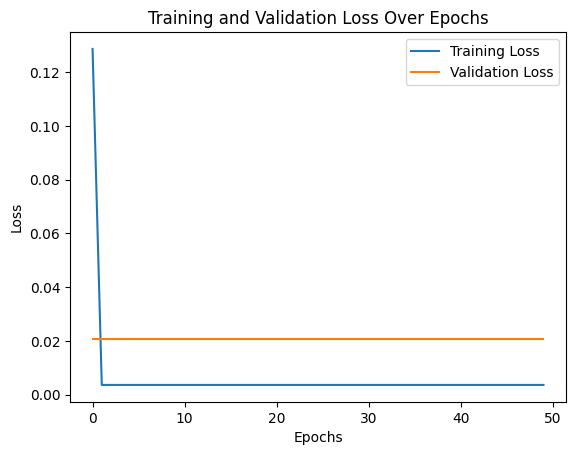

In [ ]:
plt.plot(history_cae.history['loss'], label='Training Loss')
plt.plot(history_cae.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

#4 PCA Pour réduire la dimension et extraire seulement les features importants

In [ ]:
latent_features = encoder.predict(cwt_images)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [ ]:
latent_features.shape

(1500, 128)

In [ ]:
# 4. Apply PCA to latent features
pca = PCA(n_components=128)
latent_features_pca = pca.fit_transform(latent_features)

In [ ]:
latent_features_pca.shape

(1500, 128)

In [ ]:
print("Explained variance by 128 components:", sum(pca.explained_variance_ratio_))

Explained variance by 128 components: 0.9999999204368262


#5 extract stat features et fusionner avec cae output

In [ ]:
from scipy.stats import kurtosis, skew

In [ ]:
def compute_stat_features(X):
    mean = np.mean(X, axis=1)
    var = np.var(X, axis=1)
    std = np.std(X, axis=1)
    min_val = np.min(X, axis=1)
    max_val = np.max(X, axis=1)
    range_val = max_val - min_val
    rms = np.sqrt(np.mean(np.square(X), axis=1))
    energy = np.sum(np.square(X), axis=1)
    skewness = np.mean(((X - mean[:, np.newaxis]) / std[:, np.newaxis])**3, axis=1)
    kurtosis = np.mean(((X - mean[:, np.newaxis]) / std[:, np.newaxis])**4, axis=1)
    power = np.mean(np.square(X), axis=1)
    crest_factor = max_val / rms
    shape_factor = rms / mean
    impulse_factor = max_val / mean
    return np.hstack((mean[:, np.newaxis], var[:, np.newaxis], std[:, np.newaxis], min_val[:, np.newaxis],
                     max_val[:, np.newaxis],range_val[:, np.newaxis], rms[:, np.newaxis], energy[:, np.newaxis],
                     skewness[:, np.newaxis], kurtosis[:, np.newaxis], power[:, np.newaxis], crest_factor[:, np.newaxis],
                     shape_factor[:, np.newaxis], impulse_factor[:, np.newaxis]))

In [ ]:
stat_features = compute_stat_features(X_windowed)

In [ ]:
window_ids = np.arange(len(latent_features_pca))

In [ ]:
FAE_with_ids = np.hstack((window_ids[:, np.newaxis], latent_features_pca))
Fstat_with_ids = np.hstack((window_ids[:, np.newaxis], stat_features))

In [ ]:
# Validate IDs before combining
if not np.array_equal(FAE_with_ids[:, 0], Fstat_with_ids[:, 0]):
    raise ValueError("Window IDs do not match between FAE and Fstat!")

In [ ]:
# 6. Combine PCA features with statistical features
hybrid_features = np.hstack((FAE_with_ids, Fstat_with_ids[:, 1:]))

In [ ]:
hybrid_features.shape

(1500, 143)

#6 LSTM Classifier

In [ ]:
y_categorical = to_categorical(y_windowed, num_classes=5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hybrid_features, y_categorical, test_size=0.1, random_state=42)

In [ ]:
# Build LSTM classifier
lstm_model = Sequential([
    LSTM(128, input_shape=(hybrid_features.shape[1], 1)),
    Dense(5, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print('Xtrain shape is',X_train.shape)
print('Xtest shape is',X_test.shape)
print('ytrain shape is',y_train.shape)
print('ytest shape is',y_test.shape)

Xtrain shape is (1350, 143)
Xtest shape is (150, 143)
ytrain shape is (1350, 5)
ytest shape is (150, 5)


In [ ]:
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
print('xtrain lstm shape is',X_train_lstm.shape)
print('xtest lstm shape is',X_test_lstm.shape)

xtrain lstm shape is (1350, 1, 143)
xtest lstm shape is (150, 1, 143)


In [ ]:
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_lstm=lstm_model.fit(X_train_lstm, y_train, validation_data=(X_test_lstm, y_test), epochs=50, batch_size=32)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4314 - loss: 1.4009 - val_accuracy: 0.8133 - val_loss: 0.7669
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7789 - loss: 0.7645 - val_accuracy: 0.8933 - val_loss: 0.5538
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8528 - loss: 0.5629 - val_accuracy: 0.8867 - val_loss: 0.4668
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8739 - loss: 0.4579 - val_accuracy: 0.8667 - val_loss: 0.4166
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8510 - loss: 0.4295 - val_accuracy: 0.9000 - val_loss: 0.3928
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8824 - loss: 0.3765 - val_accuracy: 0.9000 - val_loss: 0.3763
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8780 - loss: 0.3643 - val_accuracy: 0.8933 - val_loss: 0.3550
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8659 - loss: 0.3398 - val_accuracy: 0.9200 - val_loss:

In [ ]:
# Step 7: Evaluate the Model
val_accuracy = history_lstm.history['val_accuracy'][-1]
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.9333333373069763


In [ ]:
test_loss, test_accuracy = lstm_model.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9318 - loss: 0.2257 
Test Loss: 0.2277
Test Accuracy: 0.9333


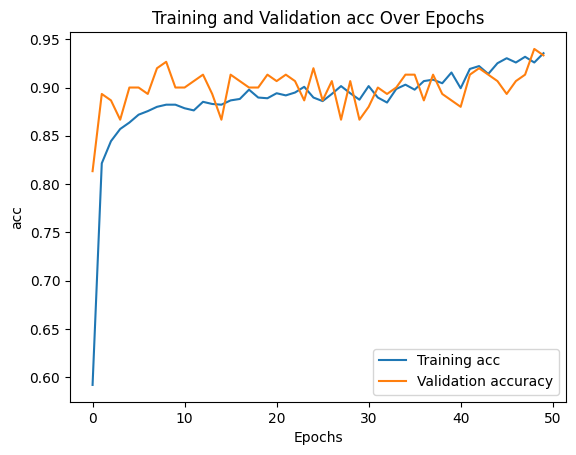

In [ ]:
plt.plot(history_lstm.history['accuracy'], label='Training acc')
plt.plot(history_lstm.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.title('Training and Validation acc Over Epochs')
plt.legend()
plt.show()

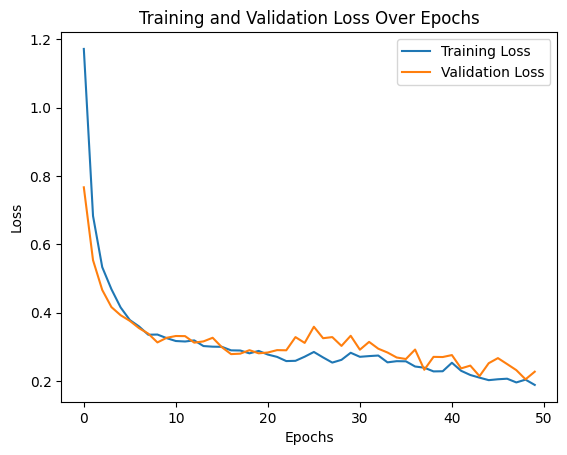

In [ ]:
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
y_pred_probs = lstm_model.predict(X_test_lstm)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)  # Predicted labels
y_true = np.argmax(y_test, axis=1)        # True labels

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
cm = confusion_matrix(y_true,y_pred)

<Axes: >

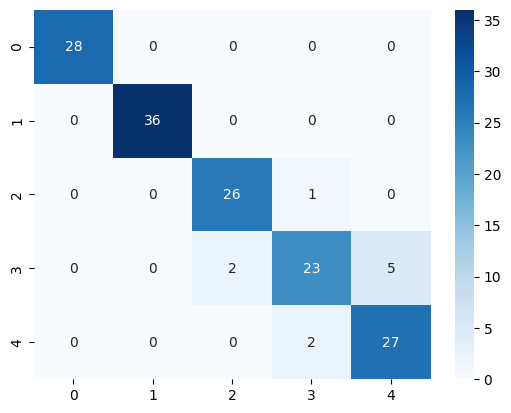

In [ ]:
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues")

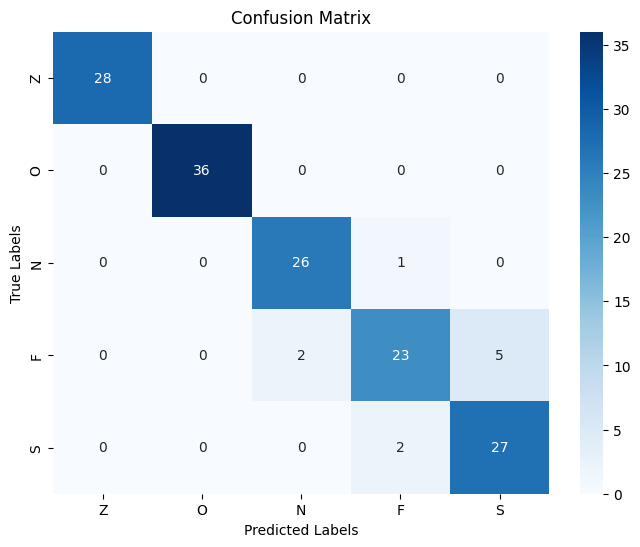

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Z', 'O', 'N', 'F', 'S'], yticklabels=['Z', 'O', 'N', 'F', 'S'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Text(0, 0.5, 'Fraction of incorrect predictions')

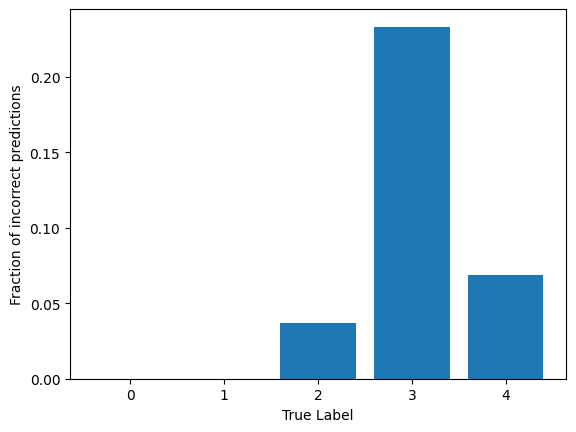

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(5), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score,recall_score,accuracy_score,f1_score

In [ ]:
print(classification_report(y_true, y_pred, target_names=['Z', 'O', 'N', 'F', 'S']))

              precision    recall  f1-score   support

           Z       1.00      1.00      1.00        28
           O       1.00      1.00      1.00        36
           N       0.93      0.96      0.95        27
           F       0.88      0.77      0.82        30
           S       0.84      0.93      0.89        29

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



#Random Forest,KNN,SVM,GBM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hybrid_features, y_windowed, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#KNN

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test_scaled)

In [ ]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.6933333333333334


#SVM

In [ ]:
# Support Vector Machine
svm = SVC(kernel='linear', probability=True)

In [ ]:
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
y_pred_svm = svm.predict(X_test_scaled)

In [ ]:
#y_pred_svm_onehot = to_categorical(y_pred_svm, num_classes=5)

In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.9555555555555556


#RF

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train, y_train)  # No scaling required for Random Forest

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))

RF Accuracy: 0.9555555555555556


#GBM

In [ ]:
# Gradient Boosting Machine
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
gbm.fit(X_train, y_train)  # No scaling required for GBM

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_gbm = gbm.predict(X_test)

In [ ]:
#y_pred_svm_onehot = to_categorical(y_pred_gbm, num_classes=5)

In [ ]:
print("GBM Accuracy:", accuracy_score(y_test, y_pred_gbm))

GBM Accuracy: 0.9955555555555555


#Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# Convert one-hot encoded labels to integer labels
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('svm', svm), ('rf', rf), ('gbm', gbm)],
    voting='soft'  # 'hard' for majority voting, 'soft' for probabilities
)

In [ ]:
# Train on integer labels
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gbm',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [ ]:
# Predict and evaluate
y_pred_voting = voting_clf.predict(X_test_scaled)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.9955555555555555


#Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
stacking_clf = StackingClassifier(
    estimators=[('knn', knn), ('svm', svm), ('rf', rf), ('gbm', gbm)],
    final_estimator=LogisticRegression()
)

In [ ]:
stacking_clf.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('svm', SVC(kernel='linear', probability=True)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('gbm',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred_stacking = stacking_clf.predict(X_test_scaled)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stacking))

Stacking Classifier Accuracy: 0.9955555555555555


#Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
boosting_clf = AdaBoostClassifier(
    estimator=rf,  # Use Random Forest as base estimator
    n_estimators=50,
    random_state=42
)

In [ ]:
boosting_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42),
                   random_state=42)

In [ ]:
y_pred_boosting = boosting_clf.predict(X_test)
print("Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_boosting))

Boosting Classifier Accuracy: 0.9755555555555555


#Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging_clf = BaggingClassifier(
    estimator=rf,  # Use Random Forest as base estimator
    n_estimators=10,
    random_state=42
)

In [ ]:
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

In [ ]:
y_pred_bagging = bagging_clf.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))

Bagging Classifier Accuracy: 0.9577777777777777


In [ ]:
# Print classification reports for all models
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))
print("Classification Report for RF:\n", classification_report(y_test, y_pred_rf))
print("Classification Report for GBM:\n", classification_report(y_test, y_pred_gbm))
print("Classification Report for Voting:\n", classification_report(y_test, y_pred_voting))
print("Classification Report for Stacking:\n", classification_report(y_test, y_pred_stacking))
print("Classification Report for Bagging:\n", classification_report(y_test, y_pred_bagging))
print("Classification Report for Boosting:\n", classification_report(y_test, y_pred_boosting))

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.61      0.98      0.75        83
           1       0.67      0.69      0.68        90
           2       0.52      0.57      0.54        79
           3       0.82      0.56      0.67       109
           4       0.98      0.71      0.82        89

    accuracy                           0.69       450
   macro avg       0.72      0.70      0.69       450
weighted avg       0.73      0.69      0.69       450

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        83
           1       0.98      0.98      0.98        90
           2       0.93      0.95      0.94        79
           3       0.93      0.93      0.93       109
           4       0.98      0.93      0.95        89

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name, class_names):
    """
    Plot confusion matrix using seaborn.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [ ]:
# Class names
class_names = ['Z', 'O', 'N', 'F', 'S']

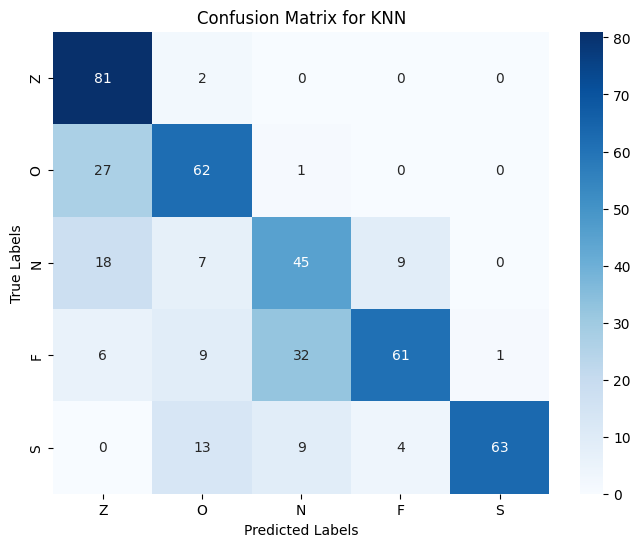

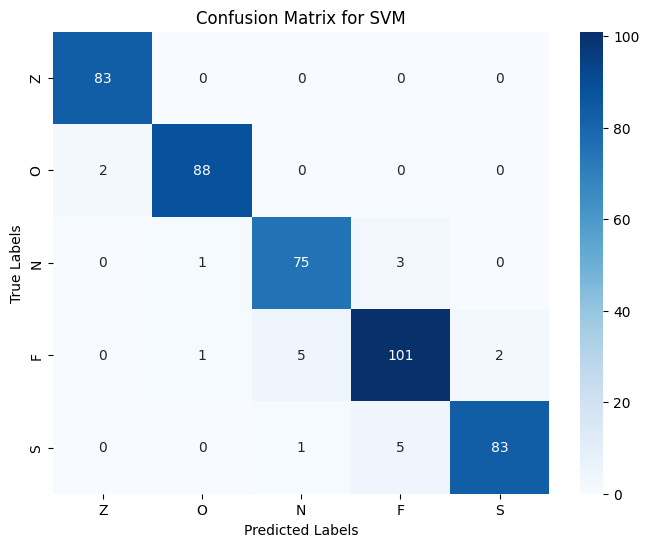

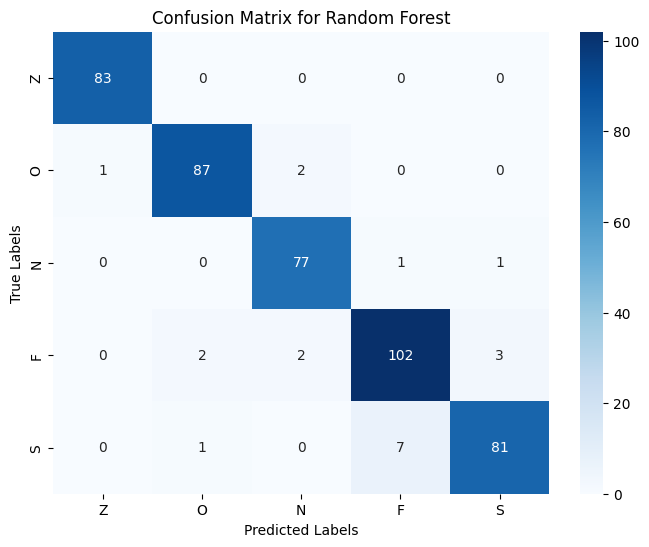

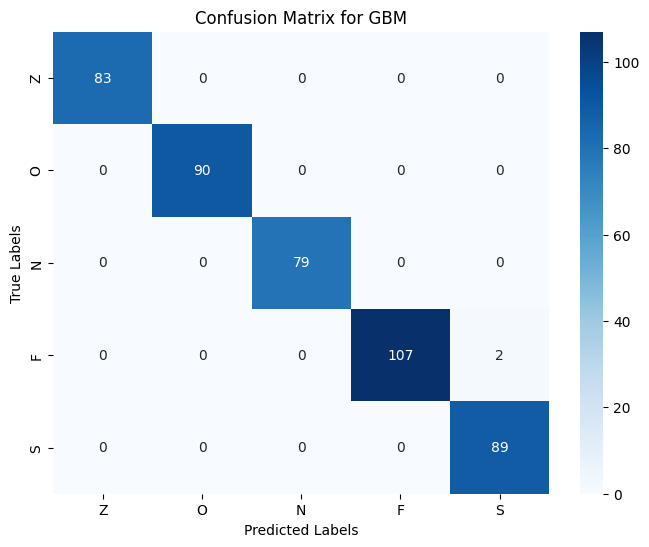

In [ ]:
# KNN
plot_confusion_matrix(y_test, y_pred_knn, model_name="KNN", class_names=class_names)
# SVM
plot_confusion_matrix(y_test, y_pred_svm, model_name="SVM", class_names=class_names)
# Random Forest
plot_confusion_matrix(y_test, y_pred_rf, model_name="Random Forest", class_names=class_names)

# GBM
plot_confusion_matrix(y_test, y_pred_gbm, model_name="GBM", class_names=class_names)

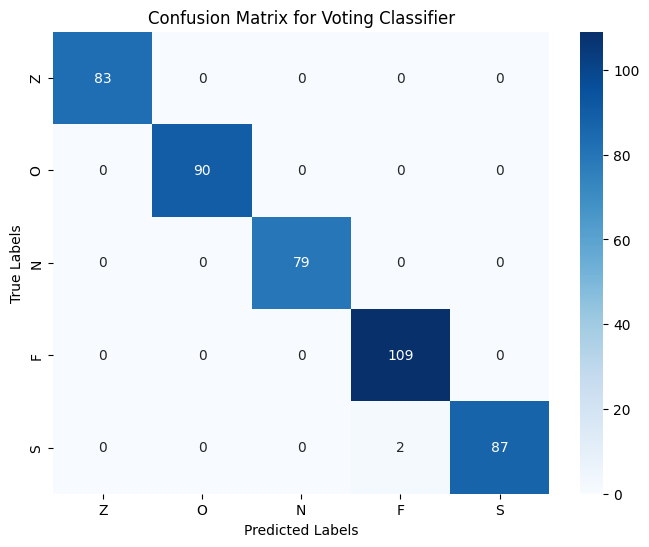

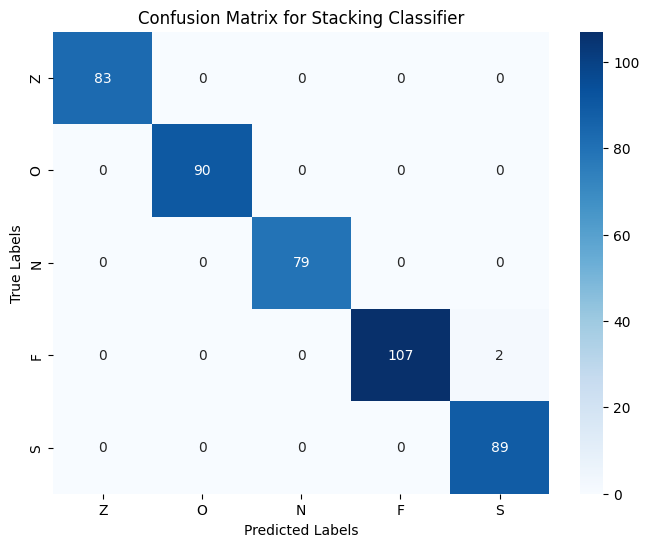

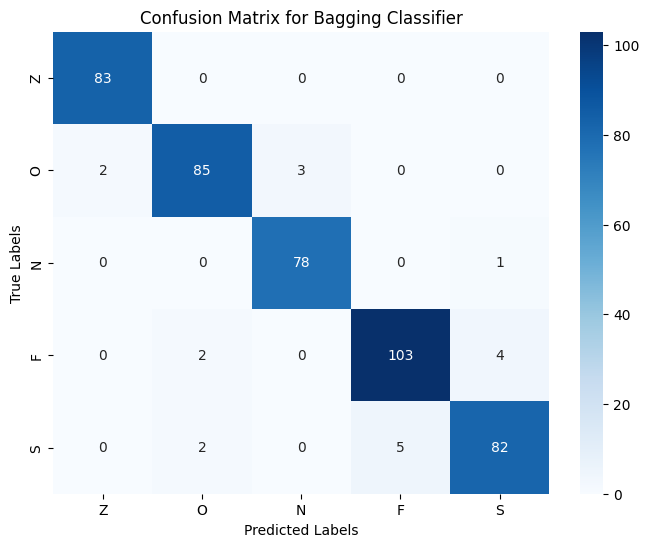

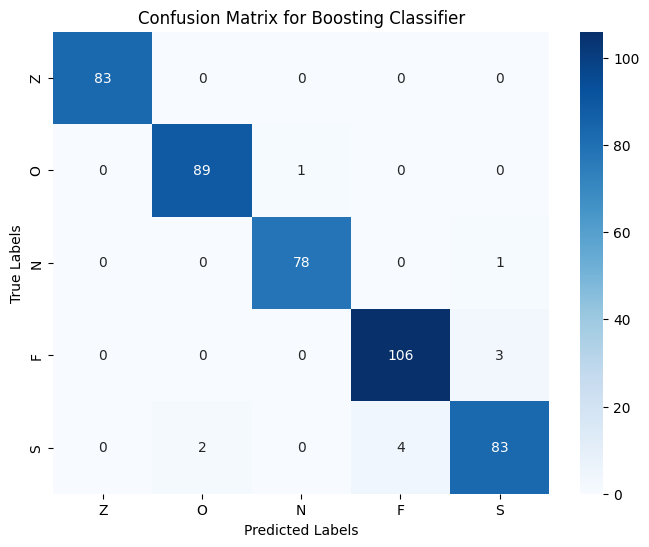

In [ ]:
# Voting Classifier
plot_confusion_matrix(y_test, y_pred_voting, model_name="Voting Classifier", class_names=class_names)

# Stacking Classifier
plot_confusion_matrix(y_test, y_pred_stacking, model_name="Stacking Classifier", class_names=class_names)

# Bagging Classifier
plot_confusion_matrix(y_test, y_pred_bagging, model_name="Bagging Classifier", class_names=class_names)

# Boosting Classifier
plot_confusion_matrix(y_test, y_pred_boosting, model_name="Boosting Classifier", class_names=class_names)

#metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# Define a function to compute metrics
def compute_metrics(y_true, y_pred, model_name):
    """
    Compute accuracy, precision, recall, and F1-score for a model.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

In [ ]:
# Collect metrics for each model
metrics = []

In [ ]:
# KNN
metrics.append(compute_metrics(y_test, y_pred_knn, model_name="KNN"))

# SVM
metrics.append(compute_metrics(y_test, y_pred_svm, model_name="SVM"))

# Random Forest
metrics.append(compute_metrics(y_test, y_pred_rf, model_name="Random Forest"))

# GBM
metrics.append(compute_metrics(y_test, y_pred_gbm, model_name="GBM"))

# Voting Classifier
metrics.append(compute_metrics(y_test, y_pred_voting, model_name="Voting Classifier"))

# Stacking Classifier
metrics.append(compute_metrics(y_test, y_pred_stacking, model_name="Stacking Classifier"))

# Bagging Classifier
metrics.append(compute_metrics(y_test, y_pred_bagging, model_name="Bagging Classifier"))

# Boosting Classifier
metrics.append(compute_metrics(y_test, y_pred_boosting, model_name="Boosting Classifier"))

In [ ]:
# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

In [ ]:
# Display metrics DataFrame
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0                  KNN  0.693333   0.731677  0.693333  0.694034
1                  SVM  0.955556   0.955780  0.955556  0.955517
2        Random Forest  0.955556   0.955545  0.955556  0.955415
3                  GBM  0.995556   0.995653  0.995556  0.995560
4    Voting Classifier  0.995556   0.995636  0.995556  0.995551
5  Stacking Classifier  0.995556   0.995653  0.995556  0.995560
6   Bagging Classifier  0.957778   0.957589  0.957778  0.957596
7  Boosting Classifier  0.975556   0.975481  0.975556  0.975483


In [ ]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.693333,0.731677,0.693333,0.694034
1,SVM,0.955556,0.955780,0.955556,0.955517
2,Random Forest,0.955556,0.955545,0.955556,0.955415
3,GBM,0.995556,0.995653,0.995556,0.995560
4,Voting Classifier,0.995556,0.995636,0.995556,0.995551
5,Stacking Classifier,0.995556,0.995653,0.995556,0.995560
6,Bagging Classifier,0.957778,0.957589,0.957778,0.957596
7,Boosting Classifier,0.975556,0.975481,0.975556,0.975483


In [ ]:
metrics_df.to_csv('model_metrics.csv', index=False)

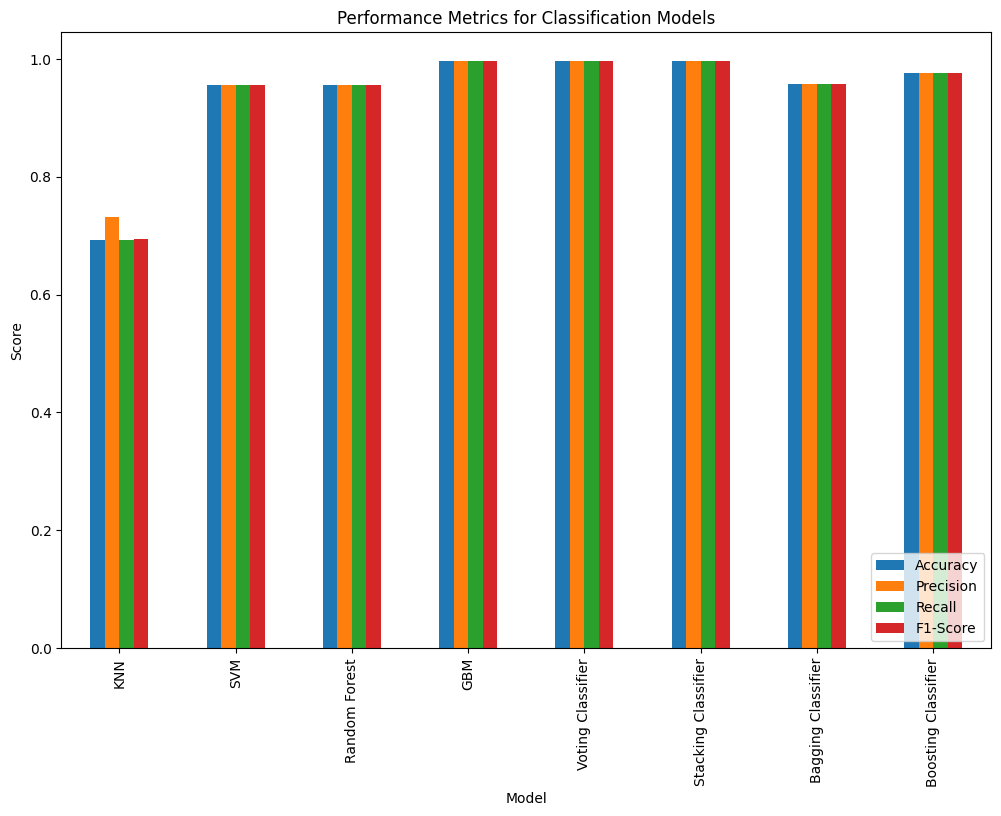

In [ ]:
# Plot a bar chart for metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title("Performance Metrics for Classification Models")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc='lower right')
plt.show()